In [13]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

# Task 0
Data extraction: get the data from 3 tables & combine it into single `.csv` file.
After that read this file using pandas to create Dataframe.
So it will be all joined data in 1 dataframe. Quick check - should be 74818 rows in it.

In [18]:
connection = sqlite3.connect("../db.sqlite3")
cursor = connection.cursor()
all_orders = pd.read_sql(
    "SELECT * "
    "FROM restaurant_orderitem "
    "INNER JOIN restaurant_order "
    "ON restaurant_order.id = restaurant_orderitem.order_id "
    "INNER JOIN restaurant_product "
    "ON restaurant_orderitem.product_id = restaurant_product.id ;",
    connection
)
cursor.close()
connection.close()
all_orders = all_orders.drop(['id', 'order_id', "product_id"], axis=1)
all_orders = all_orders.iloc[:, [3, 2, 0, 1]]
all_orders.to_csv('orders.csv', index=False)
df = pd.read_csv("orders.csv")
df.head()

,name,price,quantity,datetime
0,Plain Papadum,0.80,2,2019-08-03 20:25:00
1,King Prawn Balti,12.95,1,2019-08-03 20:25:00
2,Garlic Naan,2.95,1,2019-08-03 20:25:00
3,Mushroom Rice,3.95,1,2019-08-03 20:25:00
4,Paneer Tikka Masala,8.95,1,2019-08-03 20:25:00


# Task 1
Get Top 10 most popular products in restaurant sold by Quantity.
Count how many times each product was sold and create a pie chart with percentage of popularity (by quantity) for top 10 of them.

Example:

![pie chart](../demo/pie.png)

<Axes: title={'center': 'Popular products of the Menu (Top 10)'}>

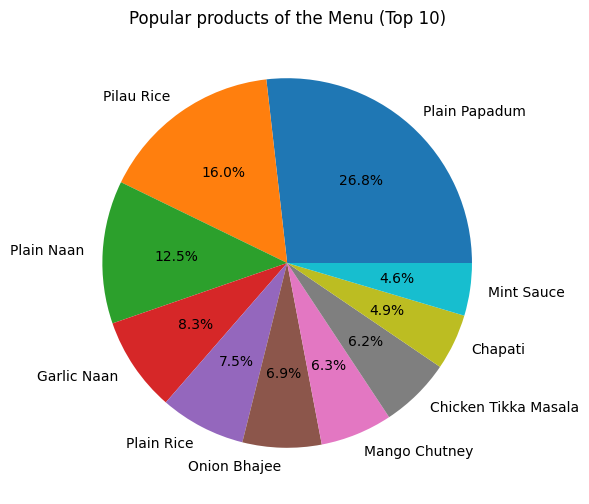

In [22]:
top_10 = df.groupby("name").sum("quantity").sort_values(by="quantity", ascending=False)[:10]
total = top_10["quantity"].sum()
top_10["percentage"] = (top_10["quantity"] * 100 / total).round(1)
top_10["percentage"].plot.pie(title="Popular products of the menu (Top 10)", figsize=(6,6), autopct='%.1f%%', ylabel="")

# Task 2
Calculate `Item Price` (Product Price * Quantity) for each Order Item in dataframe.
And Make the same Top 10 pie chart, but this time by `Item Price`. So this chart should describe not the most popular products by quantity, but which products (top 10) make the most money for restaurant. It should be also with percentage.

<Axes: title={'center': 'Products make the most money for restaurant (Top 10)'}>

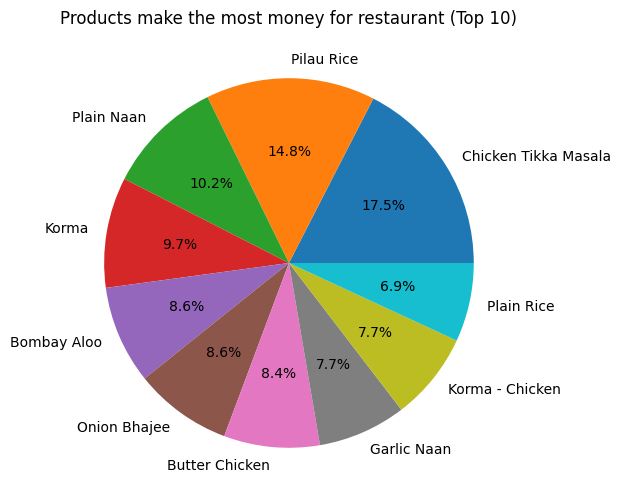

In [24]:
df["item_price"] = df["price"] * df["quantity"]
top_10_make_money = df.groupby("name").sum("item_price").sort_values(by="item_price", ascending=False)[:10]
top_10_make_money["item_price"].plot.pie(title="Products make the most money for restaurant (Top 10)", figsize=(6,6), autopct='%.1f%%', ylabel="")

# Task 3
Calculate `Order Hour` based on `Order Datetime`, which will tell about the specific our the order was created (from 0 to 23). Using `Order Hour` create a bar chart, which will tell the total restaurant income based on the hour order was created. So on x-axis - it will be values from 0 to 23 (hours), on y-axis - it will be the total sum of order prices, which were sold on that hour.

Example:

![bar chart](../demo/bar.png)

Text(0, 0.5, 'Total Income')

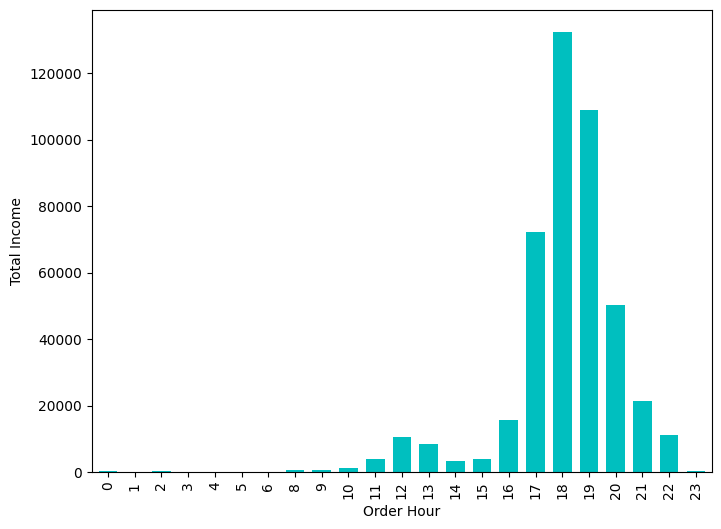

In [28]:
df["datetime"] = pd.to_datetime(df["datetime"])
df["hours"] = df["datetime"].dt.hour
top_hours = df.groupby("hours").sum("item_price").sort_values(by="hours")
top_hours.plot.bar(y="item_price", xlabel="hour", ylabel="income", width=0.7, color="c", figsize=(8,6), legend=False)
plt.xlabel("Order Hour")
plt.ylabel("Total Income")

# Task 4
Make similar bar chart, but right now with `Order Day Of The Week` (from Monday to Sunday), and also analyze total restaurant income by each day of the week.

<Axes: title={'center': "Restaurant's income per weekday"}, xlabel='Day of week', ylabel='Income'>

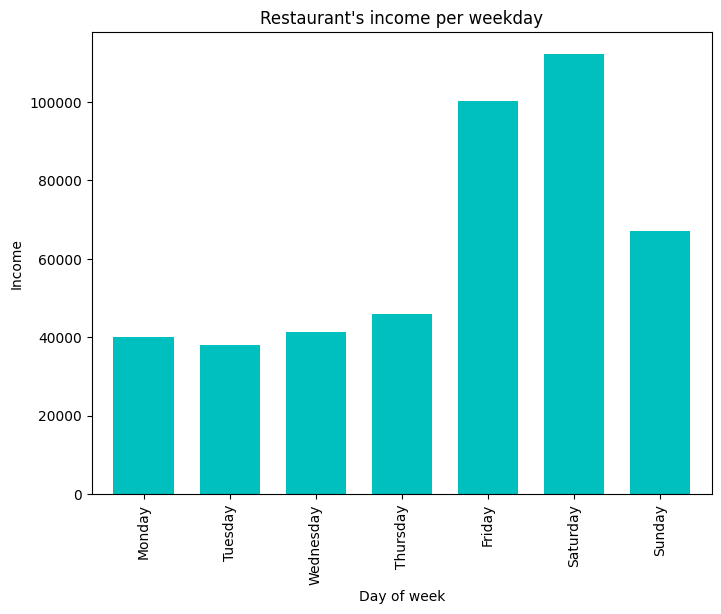

In [31]:
days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df["day_of_week"] = df["datetime"].dt.day_name()
df["day_of_week"] = pd.Categorical(df["day_of_week"], categories=days_of_week, ordered=True)
df = df.sort_values("day_of_week")
top_days = df.groupby("day_of_week").sum("item_price")
top_days.plot.bar(y="item_price" ,xlabel="Day of week", ylabel="Income", width=0.7, color="c", figsize=(8,6), legend=False, title="Restaurant's income per weekday")